## ADVANCED USE OF RNN MODELS

In [52]:
#imports

# general imports
from IPython.display import display, Markdown #just to display markdown
import numpy as np  #for vector operation
import string   # provides strings variations for character embedding
import os



# visualiaztion imports
%matplotlib inline
import matplotlib.pyplot as plt

In [53]:
display(Markdown("## TRAINING DATA "))
display(Markdown("### Temperature forecasting problem "))

data_dir = './jena_climate'
fname = os.path.join(data_dir, 'jena_climate_2009_2016.csv') # path to the data

# reading the data file
f = open(fname)
data = f.read()
f.close()

# reading the headers and the content
lines = data.split('\n')
header = lines[0].split(',')
lines = lines[1:]

display(Markdown("### Data summary \n"))
print ("\nData contains {} columns\n".format(len(header)))
print(header)

print("\nData has {} samples for training and testing\n".format(len(lines)))
print("3 sample data points")
print(lines[:3])

#data pre-processing
float_data = np.zeros((len(lines), len(header) - 1))
print (float_data.shape)
for i, line in enumerate(lines):
    values = [float(x) for x in line.split(',')[1:]] # omiting first column date & time
    float_data[i, :] = values

print("\nconverting data to numpy array\n")
print (float_data[:3])

## TRAINING DATA 

### Temperature forecasting problem 

### Data summary 



Data contains 15 columns

['"Date Time"', '"p (mbar)"', '"T (degC)"', '"Tpot (K)"', '"Tdew (degC)"', '"rh (%)"', '"VPmax (mbar)"', '"VPact (mbar)"', '"VPdef (mbar)"', '"sh (g/kg)"', '"H2OC (mmol/mol)"', '"rho (g/m**3)"', '"wv (m/s)"', '"max. wv (m/s)"', '"wd (deg)"']

Data has 420551 samples for training and testing

3 sample data points
['01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.30', '01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.10', '01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.60']
(420551, 14)

converting data to numpy array

[[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
   3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
   1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]
 [ 9.96570e+02 -8.41000e+00  2.65010e+02 -9.28000e+00  9.34000e+01
   3.23000e+00  3.02000e+00  2.10000e-01 

## PLOTTING TEMP VS TIME

### temperature plot across years & 10 days

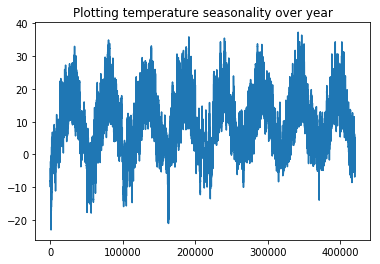

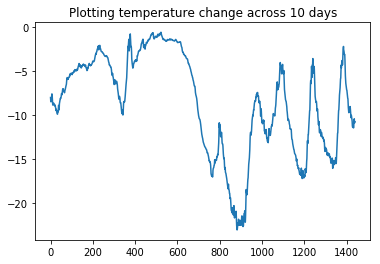

### PROBLEM STATEMENT


Given data going as far back as lookback timesteps (a timestep is 10 minutes) and 
sampled every steps timesteps, can we predict the temperature in delay timesteps?

We will use the following parameter values:

lookback = 720, i.e. our observations will go back 5 days.
steps = 6, i.e. our observations will be sampled at one data point per hour. 
delay = 144, i.e. our targets will be 24 hour in the future.




In [54]:
display(Markdown("## PLOTTING TEMP VS TIME"))

temp = float_data[:, 1]  # temperature (in degrees Celsius)

display(Markdown("### temperature plot across years & 10 days"))

# plotting temperature across years
plt.plot(range(len(temp)), temp)
plt.title('Plotting temperature seasonality over year')

plt.figure()

#plotting temperature for first 10 days collected every 10 mins a day(144 data points/day)
plt.plot(range(1440), temp[:1440])
plt.title('Plotting temperature change across 10 days')
plt.show()

display(Markdown("### PROBLEM STATEMENT"))
print ("""
Given data going as far back as lookback timesteps (a timestep is 10 minutes) and 
sampled every steps timesteps, can we predict the temperature in delay timesteps?

We will use the following parameter values:

lookback = 720, i.e. our observations will go back 5 days.
steps = 6, i.e. our observations will be sampled at one data point per hour. 
delay = 144, i.e. our targets will be 24 hour in the future.

""")

In [55]:
display(Markdown("## DATA PREPARATION"))

# pre-processing
display(Markdown("### data normalization"))

print("\n data before normalization\n")
print (float_data[:3])

float_data_ = float_data
mean = float_data_[:200000].mean(axis=0) # calcaulating mean of first 200K samples for each columns
float_data_ -= mean  # substracting the mean from each element in the column
std = float_data_[:200000].std(axis=0) # calcaulating standard deviation of first 200K samples  for each columns
float_data_ /= std  # normalizing each element in the column with the standard deviation of the columns

print("\n data after normalization\n")
print (float_data[:3])

## DATA PREPARATION

### data normalization


 data before normalization

[[ 9.96520e+02 -8.02000e+00  2.65400e+02 -8.90000e+00  9.33000e+01
   3.33000e+00  3.11000e+00  2.20000e-01  1.94000e+00  3.12000e+00
   1.30775e+03  1.03000e+00  1.75000e+00  1.52300e+02]
 [ 9.96570e+02 -8.41000e+00  2.65010e+02 -9.28000e+00  9.34000e+01
   3.23000e+00  3.02000e+00  2.10000e-01  1.89000e+00  3.03000e+00
   1.30980e+03  7.20000e-01  1.50000e+00  1.36100e+02]
 [ 9.96530e+02 -8.51000e+00  2.64910e+02 -9.31000e+00  9.39000e+01
   3.21000e+00  3.01000e+00  2.00000e-01  1.88000e+00  3.02000e+00
   1.31024e+03  1.90000e-01  6.30000e-01  1.71600e+02]]

 data after normalization

[[ 0.90014748 -1.93135845 -1.98211036 -1.86280029  1.07285236 -1.30742164
  -1.47375773 -0.79868641 -1.4762674  -1.47815522  2.12375056 -0.72950452
  -0.78067973 -0.27613603]
 [ 0.9060434  -1.97541381 -2.02567    -1.91582958  1.07883061 -1.32042698
  -1.4951961  -0.80075238 -1.49502455 -1.49932141  2.17199852 -0.93124017
  -0.88794488 -0.46317443]
 [ 0.90132666 -1.98671006

In [56]:
#creating a coustom generator
def generator(data, lookback, delay, min_index, max_index,
              shuffle=False, batch_size=128, step=6):
    if max_index is None:
        max_index = len(data) - delay - 1
    i = min_index + lookback
    while 1:
        if shuffle:
            rows = np.random.randint(
                min_index + lookback, max_index, size=batch_size)
        else:
            if i + batch_size >= max_index:
                i = min_index + lookback
            rows = np.arange(i, min(i + batch_size, max_index))
            i += len(rows)
        samples = np.zeros((len(rows),
                           lookback // step,
                           data.shape[-1]))
        targets = np.zeros((len(rows),))
        for j, row in enumerate(rows):
            indices = range(rows[j] - lookback, rows[j], step)
            samples[j] = data[indices]
            targets[j] = data[rows[j] + delay][1]
        yield samples, targets

In [57]:
display(Markdown("### applying custom generator for training data preparation"))

lookback = 1440
step = 6
delay = 144
batch_size = 128

train_gen = generator(float_data,
                      lookback=lookback,
                      delay=delay,
                      min_index=0,
                      max_index=200000,
                      shuffle=True,
                      step=step,
                      batch_size=batch_size)

val_gen = generator(float_data,
                    lookback=lookback,
                    delay=delay,
                    min_index=200001,
                    max_index=300000,
                    step=step,
                    batch_size=batch_size)

test_gen = generator(float_data,
                     lookback=lookback,
                     delay=delay,
                     min_index=300001,
                     max_index=None,
                     step=step,
                     batch_size=batch_size)
# This is how many steps to draw from `val_gen`
# in order to see the whole validation set:
val_steps = (300000 - 200001 - lookback) // batch_size
# This is how many steps to draw from `test_gen`
# in order to see the whole test set:
test_steps = (len(float_data) - 300001 - lookback) // batch_size

### applying custom generator for training data preparation